In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:/Projects/wallstreetbetx/Data/2022-06-10_df_tickets.csv")

In [3]:
df

,Ticker,Mentions
0,SPY,22
1,MLFB,11
2,TSLA,10
3,CPI,9
4,SNPW,9
5,CARV,7
6,PQEFF,6
7,RQHTF,6
8,CTXR,6
9,BBIG,6


In [8]:
API_KEY="T5188JTJK6FNUTB2"

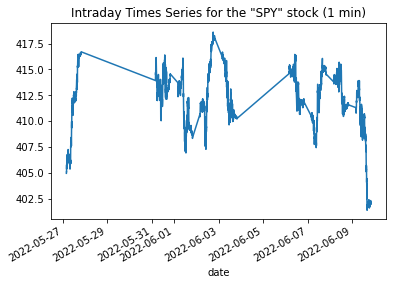

In [25]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='SPY', interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the "SPY" stock (1 min)')
plt.show()

In [36]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries
import nest_asyncio
nest_asyncio.apply()

symbols = ['SPY', 'MLFB', 'TSLA']

API_KEY="T5188JTJK6FNUTB2"
async def get_data(symbol):
    ts = TimeSeries(key=API_KEY)
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
print(results)


[{'01. symbol': 'SPY', '02. open': '409.3400', '03. high': '411.7400', '04. low': '401.4400', '05. price': '401.4400', '06. volume': '86289796', '07. latest trading day': '2022-06-09', '08. previous close': '411.2200', '09. change': '-9.7800', '10. change percent': '-2.3783%'}, {'01. symbol': 'MLFB', '02. open': '0.0230', '03. high': '0.0238', '04. low': '0.0215', '05. price': '0.0238', '06. volume': '1438957', '07. latest trading day': '2022-06-09', '08. previous close': '0.0228', '09. change': '0.0010', '10. change percent': '4.3860%'}, {'01. symbol': 'TSLA', '02. open': '748.0200', '03. high': '766.6399', '04. low': '717.9800', '05. price': '719.1200', '06. volume': '32163769', '07. latest trading day': '2022-06-09', '08. previous close': '725.6000', '09. change': '-6.4800', '10. change percent': '-0.8931%'}]


In [39]:
results[0]['05. price']


'401.4400'

In [40]:
import asyncio
import aiohttp
api_key = API_KEY
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={}&interval=5min&apikey={}'
symbols = ['AAPL', 'GOOG']
results = []
def get_tasks(session):
    tasks = []
    for symbol in symbols:
        tasks.append(session.get(url.format(symbol, api_key), ssl=False))
    return tasks


async def get_symbols():
    async with aiohttp.ClientSession() as session:
        tasks = get_tasks(session)
        responses = await asyncio.gather(*tasks)
        for response in responses:
            results.append(await response.json())
asyncio.run(get_symbols())
print(results)



[{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3. Last Refreshed': '2022-06-09 20:00:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2022-06-09 20:00:00': {'1. open': '143.0200', '2. high': '143.0900', '3. low': '142.9400', '4. close': '143.0000', '5. volume': '27506'}, '2022-06-09 19:55:00': {'1. open': '142.9400', '2. high': '143.1400', '3. low': '142.9100', '4. close': '143.1000', '5. volume': '6115'}, '2022-06-09 19:50:00': {'1. open': '142.9800', '2. high': '142.9900', '3. low': '142.9400', '4. close': '142.9400', '5. volume': '2103'}, '2022-06-09 19:45:00': {'1. open': '142.9500', '2. high': '143.0000', '3. low': '142.9500', '4. close': '143.0000', '5. volume': '3617'}, '2022-06-09 19:40:00': {'1. open': '142.9300', '2. high': '143.0000', '3. low': '142.8600', '4. close': '143.0000', '5. volume': '4023'}, '2022-06-09 19:35:00': {'1. open': '142.9800

In [43]:
results[0]['Time Series (5min)']['2022-06-09 20:00:00']['4. close']


'143.0000'

In [44]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries
import nest_asyncio
nest_asyncio.apply()

symbols = ['SPY', 'MLFB', 'TSLA']

API_KEY = "T5188JTJK6FNUTB2"


async def get_data(symbol):
    ts = TimeSeries(key=API_KEY)
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
print(results)

[{'01. symbol': 'SPY', '02. open': '409.3400', '03. high': '411.7400', '04. low': '401.4400', '05. price': '401.4400', '06. volume': '86289796', '07. latest trading day': '2022-06-09', '08. previous close': '411.2200', '09. change': '-9.7800', '10. change percent': '-2.3783%'}, {'01. symbol': 'MLFB', '02. open': '0.0230', '03. high': '0.0238', '04. low': '0.0215', '05. price': '0.0238', '06. volume': '1438957', '07. latest trading day': '2022-06-09', '08. previous close': '0.0228', '09. change': '0.0010', '10. change percent': '4.3860%'}, {'01. symbol': 'TSLA', '02. open': '748.0200', '03. high': '766.6399', '04. low': '717.9800', '05. price': '719.1200', '06. volume': '32163769', '07. latest trading day': '2022-06-09', '08. previous close': '725.6000', '09. change': '-6.4800', '10. change percent': '-0.8931%'}]
